In [6]:
# importing the modules
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split

# importing the data
train = pd.read_csv('/Desktop/BIG-MAX/BOOKS\Machine_Learning/DATA_SCIENCE/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Desktop/BIG-MAX/BOOKS\Machine_Learning/DATA_SCIENCE/house-prices-advanced-regression-techniques/test.csv')
sub = pd.read_csv('/Desktop/BIG-MAX/BOOKS\Machine_Learning/DATA_SCIENCE/house-prices-advanced-regression-techniques/sample_submission.csv')

FileNotFoundError: [Errno 2] File b'/Desktop/BIG-MAX/BOOKS\\Machine_Learning/DATA_SCIENCE/house-prices-advanced-regression-techniques/train.csv' does not exist: b'/Desktop/BIG-MAX/BOOKS\\Machine_Learning/DATA_SCIENCE/house-prices-advanced-regression-techniques/train.csv'

In [5]:
# filling the missing values in both the train and test with 0
x = train.fillna(0)
y = test.fillna(0)

# we display a summary of the data
train.describe()


NameError: name 'train' is not defined

In [3]:
# we show a correlation between data
train.corr()

NameError: name 'train' is not defined

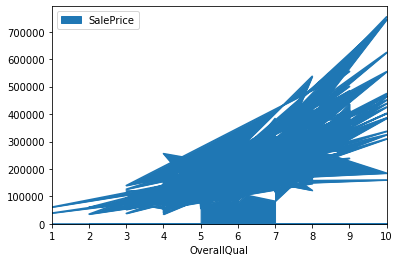

In [297]:
df = x.loc[:,['OverallQual','OverallCond','YearBuilt','SalePrice']]
df.plot.area(x = 'OverallQual', y = 'SalePrice')

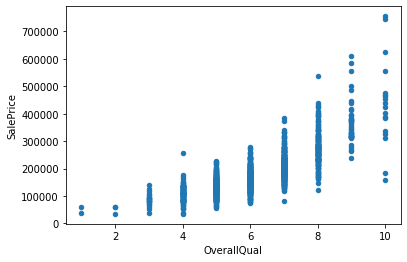

In [44]:
# a scatter plot of relationship between OverallQual and SalePrice
df.plot.scatter(x = 'OverallQual', y = 'SalePrice')

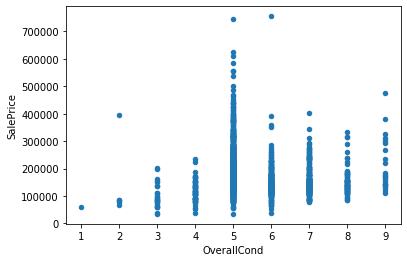

In [305]:
# relationship between overall condition and price
df.plot.scatter(x = 'OverallCond', y = 'SalePrice')

In [74]:
x_2 = train.loc[:,['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF ','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvG','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]
x_3 = x_2.fillna(0)

In [120]:
xx = x_3.drop(['SalePrice'], axis = 1)
yy = np.ravel(x_3['SalePrice'])

In [190]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(xx, yy, test_size= 0.4, random_state =42)

In [191]:
############################### training the model with SUPPORT VECTOR MACHINE ####################################
from sklearn.svm import SVR

model = SVR(kernel = 'linear')

model.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [192]:
# predicting the sales
pred = model.predict(x_test)
pred = pd.DataFrame(pred, columns=['Predicted_sales'])

In [193]:
# measuring the model MSE
from sklearn.metrics import r2_score,mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

1544261747.2100563

In [194]:
# RMSE
rmse = np.sqrt(mse)
rmse

39297.09591318494

In [1]:
za = r2_score(y_test, pred)

NameError: name 'r2_score' is not defined

In [216]:
# SELECTING THE COLUMN ID
Id = x_3['Id']
Id = Id.dropna()
Id = pd.DataFrame(Id)

In [220]:
# JOINING THE COLUMNS
result = pd.concat([Id, pred], axis = 1)

In [221]:
# PREDICTING THE RESULTS
result = result.dropna()
result

Id  Predicted_sales
0      1    144765.048835
1      2    297365.796896
2      3     98037.911681
3      4    150253.740552
4      5    258079.166693
5      6     63265.422468
6      7    200563.824123
7      8    143493.424258
8      9     59713.425970
9     10    142590.724021
10    11    111482.407126
11    12    107825.935213
12    13    139550.017245
13    14    209861.246667
14    15    189068.156934
15    16    132470.137128
16    17    197715.375507
17    18    140714.976695
18    19     88907.476543
19    20    225098.741118
20    21    189307.844181
21    22    202787.868182
22    23    186960.509575
23    24    132900.432684
24    25    210727.909743
25    26    165576.291551
26    27    187960.789712
27    28    106435.744669
28    29    187980.935500
29    30    180593.906490
..   ...              ...
554  555    142235.769039
555  556    156768.482416
556  557     29629.684857
557  558    121167.997195
558  559    181358.685462
559  560    232804.045964
560  561    149030.167217
561  562    228742.868922
562  563    198165.982418
563  564    158772.522230
564  565    290386.973822
565  566    162186.212419
566  567    304670.264982
567  568    187361.502248
568  569    206953.249322
569  570    182766.836191
570  571    157697.200303
571  572     68345.164768
572  573    222006.285210
573  574     95520.188209
574  575    152240.341178
575  576    182575.063760
576  577    224718.488829
577  578    130292.308726
578  579    260065.368447
579  580    240490.976179
580  581    133812.544394
581  582    217699.094846
582  583    350494.214747
583  584    146738.773422

[584 rows x 2 columns]

In [233]:
# TESTING WITH NEW DATA
new = xx.groupby('Id')
a = new.get_group(1460)

In [237]:
# PREDICTING
z = model.predict(a)
z = pd.DataFrame(z)
z

0
0  155143.060409

In [232]:
a

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
1459       6    2008     147500  

[1 rows x 38 columns]

In [279]:
##################################### new model GAUSSIAN ##############################################
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()

In [289]:
# model training
model_2.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [290]:
# model predicting
G_pred = model_2.predict(x_test)
G_pred = pd.DataFrame(G_pred, columns=['Predicted_sales'])

In [291]:
from sklearn.metrics import r2_score,mean_squared_error
G_test = mean_squared_error(y_test,pred)

In [292]:
G_test

1544261747.2100563

In [293]:
G_test_sq = np.sqrt(G_test)
G_test_sq

39297.09591318494

In [294]:
resul_2 = pd.concat([Id, G_pred], axis = 1)
result_2 = resul_2.dropna()
result_2

Id  Predicted_sales
0      1         152000.0
1      2         320000.0
2      3          87000.0
3      4         177000.0
4      5         280000.0
5      6         141000.0
6      7         177000.0
7      8         148500.0
8      9         141000.0
9     10         112000.0
10    11         118000.0
11    12         127500.0
12    13         160000.0
13    14         221000.0
14    15         173000.0
15    16         126000.0
16    17         173000.0
17    18         132500.0
18    19         132000.0
19    20         215000.0
20    21         230000.0
21    22         174000.0
22    23         173000.0
23    24         125000.0
24    25         173000.0
25    26         173000.0
26    27         176000.0
27    28          80000.0
28    29         173000.0
29    30         215000.0
..   ...              ...
554  555         118000.0
555  556         137500.0
556  557         139000.0
557  558         145000.0
558  559         171000.0
559  560         215000.0
560  561         151000.0
561  562         240000.0
562  563         171000.0
563  564         122000.0
564  565         191000.0
565  566         132000.0
566  567         280000.0
567  568         120000.0
568  569         192000.0
569  570         132500.0
570  571         152000.0
571  572          93000.0
572  573         193000.0
573  574          87000.0
574  575         142000.0
575  576         175500.0
576  577         186500.0
577  578         132500.0
578  579         187500.0
579  580         270000.0
580  581         129500.0
581  582         201000.0
582  583         320000.0
583  584         129500.0

[584 rows x 2 columns]

In [295]:
########################## LINEAR REGRESSION#####################################################
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression(normalize=True)

In [254]:
model_3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [272]:
LR_pred = model_3.predict(x_test)
LR_pred = pd.DataFrame(LR_pred, columns=['Predicted_sales'])

In [273]:
from sklearn.metrics import r2_score,mean_squared_error
LR_mse = mean_squared_error(y_test,LR_pred)
LR_mse

1481695805.7459166

In [274]:
LR_rmse = np.sqrt(LR_mse)
LR_rmse

38492.801999151954

In [275]:
resul_3 = pd.concat([Id,LR_pred], axis = 1)
result_3 =resul_3.dropna() 
result_3

Id  Predicted_sales
0      1    148385.380974
1      2    300850.368034
2      3    120307.089787
3      4    179763.339894
4      5    302544.949968
5      6     61875.054837
6      7    238720.313133
7      8    145782.804375
8      9     60506.388661
9     10    152622.513285
10    11    149423.684985
11    12    110030.825142
12    13     88584.048113
13    14    204789.730016
14    15    190111.612113
15    16    137153.563683
16    17    212331.643298
17    18    129502.037875
18    19    117647.793679
19    20    230169.408769
20    21    184280.555509
21    22    212032.329015
22    23    191521.783793
23    24    133676.066917
24    25    207752.997943
25    26    145865.784424
26    27    195707.304926
27    28     90873.227108
28    29    182632.139315
29    30    173895.864927
..   ...              ...
554  555    144902.910796
555  556    189939.292346
556  557     39905.352658
557  558    113301.830467
558  559    202377.350828
559  560    241122.761296
560  561    155721.289209
561  562    270886.338210
562  563    141604.944196
563  564    209954.566615
564  565    322271.067354
565  566    149545.932898
566  567    312694.742729
567  568    195546.717948
568  569    237375.397405
569  570    183379.109975
570  571    173162.949903
571  572     86287.648915
572  573    226536.408252
573  574     83746.973725
574  575    123331.195874
575  576    184373.602547
576  577    255666.139960
577  578    164682.283409
578  579    255902.886663
579  580    260982.786498
580  581    161042.219448
581  582    200061.212521
582  583    333568.897061
583  584    124789.576676

[584 rows x 2 columns]